# Master M2 MVA 2021/2022 - Introduction to (deep) Probabilistic Graphical Models - Homework 1
**Author: Hugo SIMON**

In [1]:
# from IPython.display import Markdown as md
# from IPython.core.display import display, HTML
# display(HTML("<style>.jp-CodeCell.jp-mod-outputsScrolled .jp-Cell-outputArea { max-height: 44em; }</style>"))
%matplotlib widget
%load_ext autoreload
%autoreload

import numpy as np
# from opt_einsum import contract
from sklearn.metrics import log_loss, accuracy_score
import matplotlib.pyplot as plt

# 1- Linear classification

## 1.1 LDA

a. The generative model is
$$p(x, y \mid \pi, \mu, C)=p(x \mid y, \mu, C) p(y \mid \pi)=\mathcal N \left(x \mid \mu_{y}, C\right) \pi^{y}(1-\pi)^{1 - y} \quad\left(\text{where } \mu=\left(\mu_{0}, \mu_{1}\right)^{\top}\right)$$
Denoting by $L(x,y \mid \pi, \mu, C)$ the log-likelihood, we have
\begin{align}
\nabla_\pi L &= \sum_{i=1}^N \frac y \pi - \frac {1-y} {1-\pi} = \frac {n_1} \pi - \frac {n_0} {1-\pi} = 0 
\iff \pi = \frac {n_1} N \quad (\text{where } n_1 =  \sum_{i=1}^N y_i\text{ and }  n_0 = N - n_1) \\
\nabla_\mu L &= -\begin{pmatrix} \sum_{i=1}^N (1-y_i) C^{-1} (x_i-\mu_0) \\  \sum_{i=1}^N  y_i C^{-1} (x_i-\mu_1) \end{pmatrix} = 0 
\iff \mu = \begin{pmatrix} \frac 1 {n_0} \sum_{i=1}^N (1-y_i) x_i \\ \frac 1 {n_1} \sum_{i=1}^N y_i x_i \end{pmatrix} \\
\nabla_C L &= - \frac N 2 C^{-1} + \frac 1 2 \sum_{i=1}^N C^{-1} (x_i-\mu_{y_i})(x_i-\mu_{y_i})^\top C^{-1} = 0
\iff C = \frac 1 N  \sum_{i=1}^N (x_i-\mu_{y_i})(x_i-\mu_{y_i})^\top
\end{align}

b. The conditional distribution is
$$p(y \mid x) = \frac {p(x, y)} {p(x)} = \frac { \pi^{y}(1-\pi)^{1 - y} \mathcal N \left(x \mid \mu_{y}, C\right)} {\pi N \left(x \mid \mu_{1}, C\right) + (1-\pi) N \left(x \mid \mu_{0}, C\right)}$$
In particular
$$p(y = 1 \mid x) = \frac {p(x, y)} {p(x)} = \frac { \pi \mathcal N \left(x \mid \mu_{1}, C\right)} {\pi \mathcal N \left(x \mid \mu_{1}, C\right) + (1-\pi) \mathcal N \left(x \mid \mu_{0}, C\right)} = \frac 1 {1+ \frac {1-\pi} \pi \frac {\mathcal N \left(x \mid \mu_{0}, C\right)} { \mathcal N \left(x \mid \mu_{1}, C\right)} }$$
Let be $\omega = C^{-1}(\mu_1 - \mu_0)$ and $b = \frac 1 2 (\lVert \mu_0 \rVert^2_{C^{-1}} - \lVert \mu_1 \rVert^2_{C^{-1}})$  
We then have
$$ p(y = 1 \mid x) = \frac 1 {1 + \frac {1-\pi} \pi exp(-(\omega^\top x + b)) } = \sigma( \omega^\top x + b + \log \left( \frac \pi {1-\pi} \right))$$
where $\sigma$ denotes the sigmoid function.

It is exactly the same form as the logistic regression ( taking $b' = b + \log \left( \frac \pi {1-\pi} \right) $ ).

dataset A loaded
feature dim: (2,), train size: 100, test size: 100
dataset B loaded
feature dim: (2,), train size: 200, test size: 200
dataset C loaded
feature dim: (2,), train size: 300, test size: 300


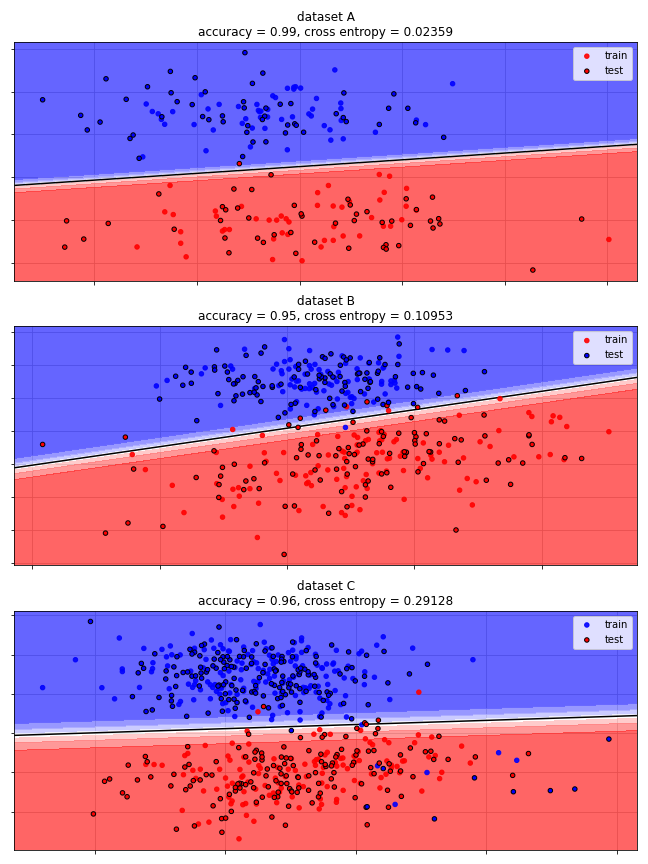

In [8]:
from utils import load_data, plot_decision_function
from classifiers import LDA

dataset_name_list = ['A', 'B', 'C']
fig, axes = plt.subplots(len(dataset_name_list),1, figsize=(9,12))

for i in range(len(dataset_name_list)):
    
    dataset_name = dataset_name_list[i]
    dataset = load_data(dataset_name, verbose=True)
    X_train, y_train, X_test, y_test = dataset
    
    lda = LDA()
    lda.fit(X_train, y_train)
    y_test_hat, y_test_proba = lda.predict(X_test), lda.predict_proba(X_test)
    acc, cross_entropy = accuracy_score(y_test, y_test_hat), log_loss(y_test,y_test_proba) 
    
    plot_decision_function( lda, dataset, "dataset "+dataset_name+"\n"+\
                                f"accuracy = {acc:.2f}, cross entropy = {cross_entropy:.5f}", axes[i] )
fig.tight_layout()

## 1.2 Logisitic regression

dataset A loaded
feature dim: (2,), train size: 100, test size: 100
parameters learnt [b, omega_1, omega_2] = [ 72.27519057   3.66812533 -13.03905191]
dataset B loaded
feature dim: (2,), train size: 200, test size: 200
parameters learnt [b, omega_1, omega_2] = [13.43009843  1.84238645 -3.71392059]
dataset C loaded
feature dim: (2,), train size: 300, test size: 300
parameters learnt [b, omega_1, omega_2] = [18.80703534 -0.27693417 -1.914198  ]


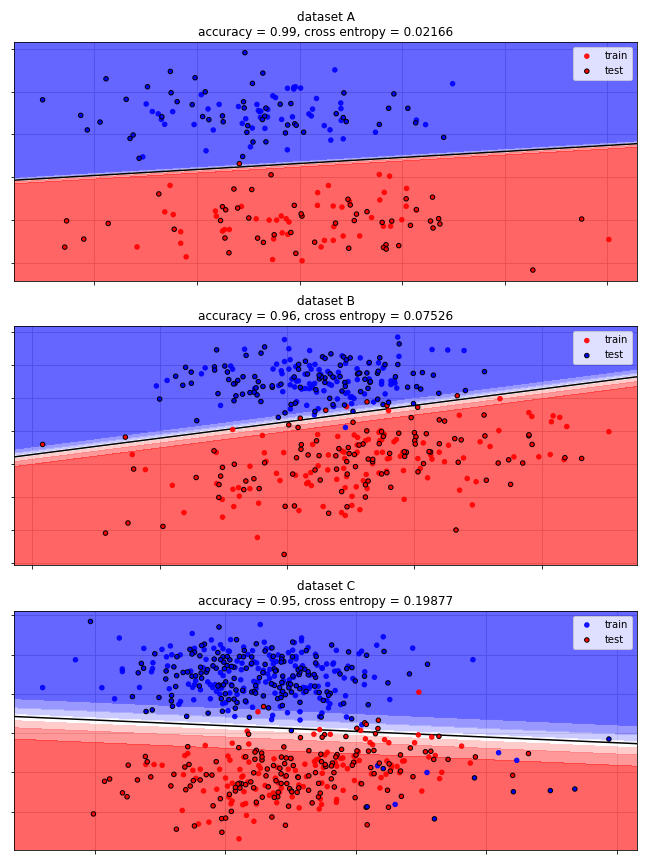

In [4]:
from utils import load_data, plot_decision_function
from classifiers import LogisticRegression

dataset_name_list = ['A', 'B', 'C']
fig, axes = plt.subplots(len(dataset_name_list),1, figsize=(9,12))

for i in range(len(dataset_name_list)):
    
    dataset_name = dataset_name_list[i]
    dataset = load_data(dataset_name, verbose=True)
    X_train, y_train, X_test, y_test = dataset
    
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)
    print(f"parameters learnt [b, omega_1, omega_2] = {log_reg.w}")
    y_test_hat, y_test_proba = log_reg.predict(X_test), log_reg.predict_proba(X_test)
    acc, cross_entropy = accuracy_score(y_test, y_test_hat), log_loss(y_test,y_test_proba) 
    
    plot_decision_function( log_reg, dataset, "dataset "+dataset_name+"\n"+\
                                f"accuracy = {acc:.2f}, cross entropy = {cross_entropy:.5f}", axes[i] )
fig.tight_layout()

## 1.3 Linear regression

dataset A loaded
feature dim: (2,), train size: 100, test size: 100
parameters learnt [b, omega_1, omega_2] = [ 1.38345774  0.05582438 -0.17636636]
dataset B loaded
feature dim: (2,), train size: 200, test size: 200
parameters learnt [b, omega_1, omega_2] = [ 0.88249984  0.08258172 -0.14757517]
dataset C loaded
feature dim: (2,), train size: 300, test size: 300
parameters learnt [b, omega_1, omega_2] = [ 1.64015206  0.01675461 -0.15897174]


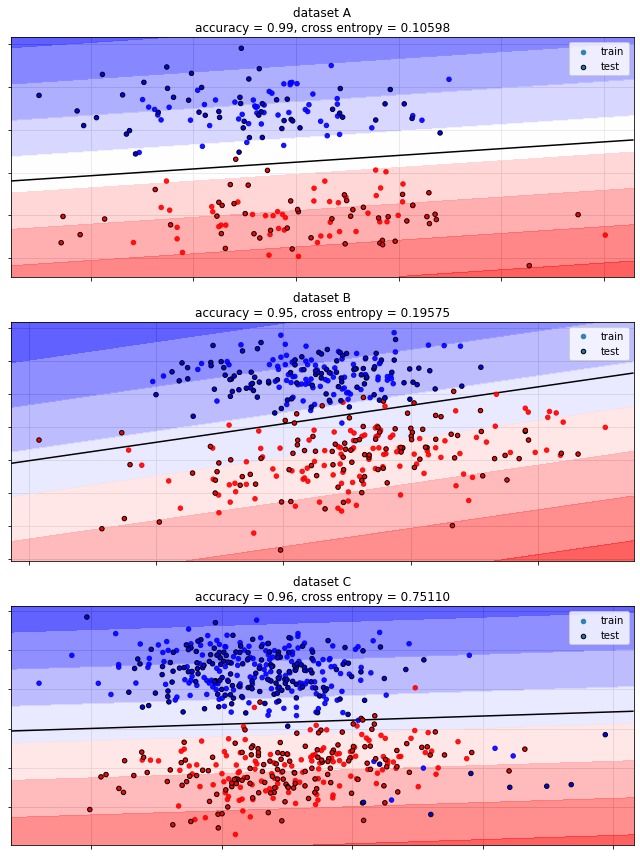

In [4]:
%autoreload
from utils import load_data, plot_decision_function
from classifiers import LinearRegression

dataset_name_list = ['A', 'B', 'C']
fig, axes = plt.subplots(len(dataset_name_list),1, figsize=(9,12))

for i in range(len(dataset_name_list)):
    
    dataset_name = dataset_name_list[i]
    dataset = load_data(dataset_name, verbose=True)
    X_train, y_train, X_test, y_test = dataset
    
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    print(f"parameters learnt [b, omega_1, omega_2] = {lin_reg.w}")
    y_test_hat, y_test_proba = lin_reg.predict(X_test), lin_reg.predict_proba(X_test)
    acc, cross_entropy = accuracy_score(y_test, y_test_hat), log_loss(y_test,y_test_proba) 
    
    plot_decision_function( lin_reg, dataset, "dataset "+dataset_name+"\n"+\
                                f"accuracy = {acc:.2f}, cross entropy = {cross_entropy:.5f}", axes[i] )
fig.tight_layout()

## 1.4 Application

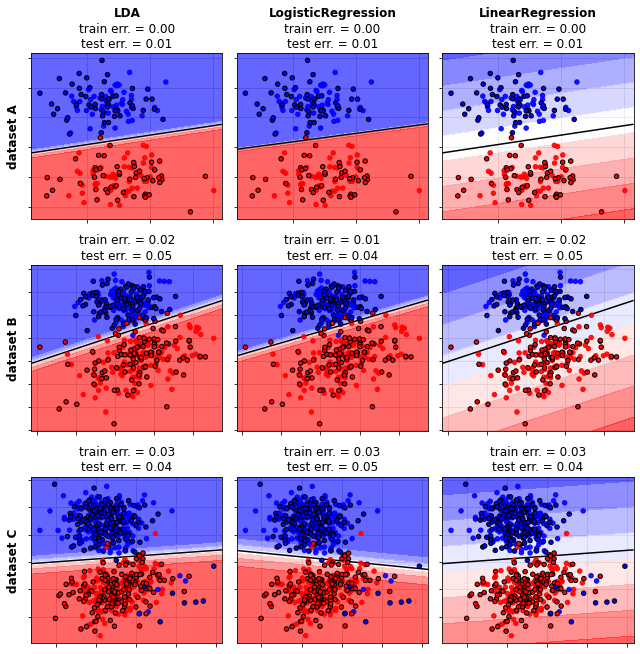

In [5]:
dataset_name_list = ['A', 'B', 'C']
classifier_list = [LDA, LogisticRegression, LinearRegression]
fig, axes = plt.subplots(len(dataset_name_list),len(classifier_list), figsize=(9,9))
fig.tight_layout()

for cl_id in range(len(classifier_list)):
    for ds_id in range(len(dataset_name_list)):
    
        dataset_name = dataset_name_list[ds_id]
        dataset = load_data(dataset_name, verbose=False)
        X_train, y_train, X_test, y_test = dataset

        classifier = classifier_list[cl_id]()
        classifier.fit(X_train, y_train)
        y_train_hat, y_test_hat = classifier.predict(X_train), classifier.predict(X_test)
        train_err = 1-accuracy_score(y_train, y_train_hat)
        test_err = 1-accuracy_score(y_test, y_test_hat)

        plot_decision_function( classifier, dataset, title=f"train err. = {train_err:.2f}\ntest err. = {test_err:.2f}",
                               ax=axes[ds_id, cl_id], plot_legend=False )
        if cl_id==0:
            axes[ds_id, 0].set_ylabel("dataset "+dataset_name, size="large", fontweight="bold")    
    axes[0, cl_id].set_xlabel(classifier_list[cl_id].__name__, labelpad=-220, size="large", fontweight="bold")
fig.tight_layout()

According to differences between train and test errors, dataset B is the least represented by its training set.  
All 3 algorithm perform well with dataset A, LogisticRegression performs best for dataset B but performs worse for dataset C.  
According to decision function and decision frontier, LDA and LogisticRegression are very close (see question 1.1.b.).  
Maybe the Bernoulli + Gaussian (LDA) assumption is more true for dataset C whereas Bernoulli + sigmoid (LogisticRegression) fits better to the true generative model of dataset B.

# 2- Gaussian mixtue models and EM

## 1. Math

* The log-likelihood of a Gaussian mixture model is given by
$$L_{\left(x_{1}, \ldots, x_{N}\right)}(\pi, \mu, C) =\sum_{i=1}^{N} \log p\left(x_{i} \mid \pi, \mu, C\right) 
=\sum_{i=1}^{N} \log \left(\sum_{k=1}^{K} \pi_{k} \mathcal{N}\left(x_{i} \mid \mu_{k}, C_{k}\right)\right)$$

* Introducing latent variable $(Z_i)_i \overset{i.i.d.}{\sim} \mathcal{M}\left(1, \pi\right)$ such that $X_{i} \mid Z_{i k}=1 \sim \mathcal{N}\left(\mu_{k}, C_{k}\right)$  
The complete data log-likelihood is then given by
$$L_{\left(x_{i}, z_{i}\right)_{i}}(\pi, \mu, C) =\log p\left(\left(x_{i}, z_{i}\right)_{i} \mid \pi, \mu, C\right)
=\sum_{i=1}^{N} \sum_{k=1}^{K} z_{i k} \log \left(\pi_{k}  \mathcal{N}\left(x_{i} \mid \mu_{k}, C_{k}\right)\right)$$
and its conditional probability is
$$p\left(z_{i} \mid x_{i}, \pi, \mu, C\right)=\mathcal{M}\left(z_{i} \mid 1, \tau_{i}\right)$$
with tractable parameter 
$$\tau_{i,k} = \frac {\pi_k \mathcal N (x_i \mid \mu_k, C_k)} {\sum_{l=1}^K \pi_l \mathcal N (x_i \mid \mu_l, C_l)} = \mathbb{E}\left[z_{i,k}\right]$$  
KL divergence of the variational decomposition is then minimized, in this case even reduced to 0. **That's the E step**.

* One can now compute maximum-likelihood estimation of parameters $\pi, \mu$ and $C$ for the expected complete data log-likelihood
$$\mathbb{E}_{\left(Z_{i}\right)_{i}}\left[L_{\left(x_{i}, Z_{i}\right)_{i}}(\pi, \theta)\right]=\sum_{i=1}^{n} \sum_{k=1}^{K} \mathbb{E}\left[z_{i,k}\right] \log \left(\pi_{k} \mathcal{N}\left(\mu_{k}, \Sigma_{k}\right)\right)$$
which are given by
\begin{align}
    n_k &= \sum_{i=1}^N \tau_{i,k} \\
    \pi_k &= \frac {n_k} {\sum_{k=1}^K n_k} \\
    \mu_k &= \frac 1 {n_k} \sum_{i=1}^N \tau_{i,k} x_i \\
    C_k &= \frac 1 {n_k} \sum_{i=1}^N \tau_{i,k} (x_i-\mu_k)(x_i-\mu_k)^\top
\end{align}**That's the M step**. Repeat until convergence for (hopefully) nice results!

## 2. Implementation

In [6]:
import pandas as pd
data = pd.read_csv("./data/decathlon.csv", sep=",")
data[:5]

,rownames,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m
0,SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7
1,CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5
2,KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2
3,BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1
4,YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4


In [7]:
from scipy.stats import multivariate_normal
def EM(X, K, nb_iter):
    tau = np.random.rand(len(X),K)
    
    for itr in range(nb_iter):
        # === M step ===
        n = tau.sum(axis=0)
        pi = n / n.sum()
        mu = (tau.T @ X) / n[:,None]
        C = (X - mu[:,None]).transpose((0,2,1)) @ ( tau[None].T * (X - mu[:,None]) ) / n[:,None,None]

        # === E step ===
        weighted_normals = np.array([pi[cluster] * multivariate_normal(mu[cluster], C[cluster], allow_singular=True).pdf(X) for cluster in range(K)])
        tau = (weighted_normals / weighted_normals.sum(axis=0)).T
    
    y_MAP = tau.argmax(axis=1)
    return pi, mu, C, y_MAP

## 3. Application

In [8]:
X = np.array(data.iloc[:,1:])
K = 3
nb_iter = 10

pi, mu, C, y_MAP = EM(X, K, nb_iter)

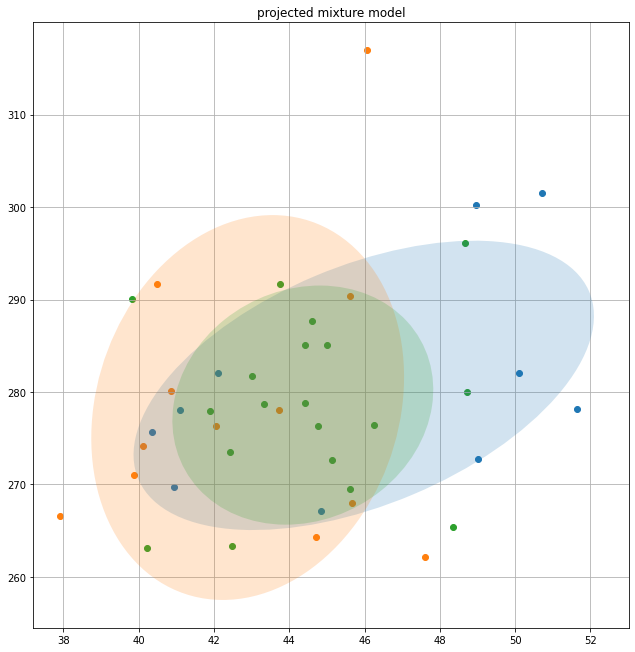

In [9]:
from utils import plot_ellipse
fig, axes = plt.subplots(1,1, figsize=(9,9))
fig.tight_layout()

dim1, dim2 = 6,9 # dimensions to project on
for cluster in range(K):
    plot_ellipse(mu[cluster,[dim1,dim2]], C[cluster,[dim1,dim2],:][:,[dim1,dim2]], axes, alpha=0.2, facecolor='C'+str(cluster))
    plt.scatter(X[y_MAP==cluster, :][:,dim1], X[y_MAP==cluster, :][:,dim2], color='C'+str(cluster))
plt.grid(zorder=0), plt.title("projected mixture model");

Even with a small dataset, we are able to softly cluster athletes in some "intuitive" clusters "runners", "jumpers" and "throwers". 